In [237]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
loans = pd.read_csv('/Users/anand.keshri/upgrad/loan.csv')

loans.drop(['id',
'member_id',
'emp_title',
'emp_length',
'pymnt_plan',
'url',
'desc',
'zip_code',
'initial_list_status',
'collections_12_mths_ex_med',
'mths_since_last_major_derog',
'policy_code',
'application_type',
'annual_inc_joint',
'dti_joint',
'verification_status_joint',
'acc_now_delinq',
'tot_coll_amt',
'tot_cur_bal',
'tot_coll_amt',
'tot_cur_bal',
'open_acc_6m',
'open_il_6m',
'open_il_12m',
'open_il_24m',
'mths_since_rcnt_il',
'total_bal_il',
'il_util',
'open_rv_24m',
'max_bal_bc',
'all_util',
'total_rev_hi_lim',
'inq_fi',
'total_cu_tl',
'inq_last_12m',
'acc_open_past_24mths',
'avg_cur_bal',
'bc_open_to_buy',
'bc_util',
'chargeoff_within_12_mths',
'delinq_amnt',
'mo_sin_old_il_acct',
'mo_sin_old_il_acct',
'mo_sin_old_rev_tl_op',
'mo_sin_rcnt_rev_tl_op',
'mo_sin_rcnt_tl',
'mort_acc',
'mths_since_recent_bc',
'mths_since_recent_bc_dlq',
'mths_since_recent_inq',
'mths_since_recent_revol_delinq',
'num_accts_ever_120_pd',
'num_actv_bc_tl',
'num_actv_rev_tl',
'num_bc_sats',
'num_bc_tl',
'num_il_tl',
'num_op_rev_tl',
'num_rev_accts',
'num_rev_tl_bal_gt_0',
'num_sats',
'num_tl_120dpd_2m',
'num_tl_30dpd',
'num_tl_90g_dpd_24m',
'num_tl_op_past_12m',
'pct_tl_nvr_dlq',
'percent_bc_gt_75',
'pub_rec_bankruptcies',
'tax_liens',
'tot_hi_cred_lim',
'total_bal_ex_mort',
'total_bc_limit',
'total_il_high_credit_limit'], axis = 1, inplace=True)

#for col in loans.columns:
    #print(col)
    
#print (len(loans['loan_status']))

#Total Rows =  39717

#Removed the rows which has loan_status == Current

loans = loans[loans['loan_status'] != 'Current']
print (len(loans['loan_status']))
#Total Rows without = "Current"
print (pd.unique(loans['loan_status']))



#Percentage of data which is distributed in this two segment "['Fully Paid' 'Charged Off']"


s = loans.loan_status
#print(s)
counts = s.value_counts()
percent = s.value_counts(normalize=True)
percent100 = s.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.DataFrame({'counts': counts, 'per': percent, 'per100': percent100})


#counts	per	per100
#Fully Paid	32950	0.854136	85.4%
#Charged Off	5627	0.145864	14.6%


#Understanding of the annual_inc 
print ("mean = {0} max = {1}".format( loans['annual_inc'].median(), loans['annual_inc'].max()))

print(loans.groupby('loan_status').annual_inc.quantile([0.75]))

#It has been identified that the outlier in annual_inc is more than 200000
print(loans[loans.annual_inc < 200000].groupby('loan_status').annual_inc.quantile([0.75]))

#But there is no impact of the 0.75 quantile

#plt.hist(loans['annual_inc'])
#plt.show()

#plt.scatter(loans['loan_status'],loans['annual_inc'])
#plt.show()

#Annual income has very less impact on the charged off cases. 0.75 quantile for both chargeoff and fully paid are

#loan_status    after removing outliers  
#Charged Off  0.75    74000.0
#Fully Paid   0.75    81085.0



loans_ownership_loanstatus = loans.groupby(['home_ownership','loan_status']).loan_status.count()
print(loans_ownership_loanstatus)
loans_ownership = loans.groupby(['home_ownership']).loan_status.count()
print(loans_ownership)
loans_ownership_loanstatus = loans_ownership_loanstatus.div(loans_ownership, level = 'home_ownership') * 100
print(loans_ownership_loanstatus)




#loans_ownership_loanstatus = loans.groupby(['home_ownership','loan_status']).agg({'loan_status': 'count'})
#loans_ownership_loanstatus = loans.groupby(['home_ownership','loan_status']).agg({'loan_status': 'count'}).reindex()
#print(loans_ownership_loanstatus)


#loans_ownership_loanstatus['percentage'] = 100 * loans_ownership_loanstatus['loan_status'] / loans_ownership_loanstatus.groupby('home_ownership')['loan_status'].transform('sum')

#for i in loans_ownership_loanstatus.columns:
 #   print(i)






#The above data clarifies that there is a slight change in the percentage contribution to the loan status

#plt.boxplot([loans_ownership_loanstatus['percentage']])
#plt.show()




#Analysis on verification_status


loans_verification_status = loans.groupby(['verification_status','loan_status']).agg({'loan_status': 'count'})
loans_verification_status['percentage'] = 100 * loans_verification_status['loan_status'] / loans_verification_status.groupby('verification_status')['loan_status'].transform('sum')
print(loans_verification_status)


#Not Verified source has lesser charged off percentage


#Analysis on purpose


loans_purpose = loans.groupby(['purpose','loan_status']).agg({'loan_status': 'count'})
loans_purpose['percentage'] = 100 * loans_purpose['loan_status'] / loans_purpose.groupby('purpose')['loan_status'].transform('sum')
print(loans_purpose)


#purpose has highest number charged off percentage for 'renewable_energy', 'small_business' more than 18%


#Analysis on addr_state


loans_addr_state = loans.groupby(['addr_state','loan_status']).agg({'loan_status': 'count'})
loans_addr_state['percentage'] = 100 * loans_addr_state['loan_status'] / loans_addr_state.groupby('addr_state')['loan_status'].transform('sum')
print(loans_addr_state)


#addr_state -- Need to analyze


#Analysis on grade




loans_grade = loans.groupby(['grade','loan_status']).agg({'loan_status': 'count'})
loans_grade['percentage'] = 100 * loans_grade['loan_status'] / loans_grade.groupby('grade')['loan_status'].transform('sum')
loans_grade.rename(columns={"loan_status": "loan_status_count"}, inplace=True)
loans_grade.reset_index()
#sns.barplot(x = loans_grade.index), y = loans_grade.values)
print(loans_grade)


#grade -- Grade E G and F has highest number of charged offs  more than 26%


#Analysis on sub_grade


loans_sub_grade = loans.groupby(['sub_grade','loan_status']).agg({'loan_status': 'count'})
loans_sub_grade['percentage'] = 100 * loans_sub_grade['loan_status'] / loans_sub_grade.groupby('sub_grade')['loan_status'].transform('sum')
print(loans_sub_grade)


#sub_grade -- sub_grade Further lower the grade the more the charged off






/var/folders/kp/4mdlby_s1_n2rndtn7k_2kd0_rkjpd/T/ipykernel_3569/677394839.py:6: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loans = pd.read_csv('/Users/anand.keshri/upgrad/loan.csv')


38577
['Fully Paid' 'Charged Off']
mean = 58868.0 max = 6000000.0
loan_status      
Charged Off  0.75    75000.0
Fully Paid   0.75    84000.0
Name: annual_inc, dtype: float64
loan_status      
Charged Off  0.75    74000.0
Fully Paid   0.75    81085.0
Name: annual_inc, dtype: float64
home_ownership  loan_status
MORTGAGE        Charged Off     2327
                Fully Paid     14694
NONE            Fully Paid         3
OTHER           Charged Off       18
                Fully Paid        80
OWN             Charged Off      443
                Fully Paid      2532
RENT            Charged Off     2839
                Fully Paid     15641
Name: loan_status, dtype: int64
home_ownership
MORTGAGE    17021
NONE            3
OTHER          98
OWN          2975
RENT        18480
Name: loan_status, dtype: int64
home_ownership  loan_status
MORTGAGE        Charged Off     13.671347
                Fully Paid      86.328653
NONE            Fully Paid     100.000000
OTHER           Charged Off     

                   home_ownership  percentage
grade loan_status                            
A     Charged Off             602    5.993031
      Fully Paid             9443   94.006969
B     Charged Off            1425   12.205567
      Fully Paid            10250   87.794433
C     Charged Off            1347   17.194281
      Fully Paid             6487   82.805719
D     Charged Off            1118   21.986234
      Fully Paid             3967   78.013766
E     Charged Off             715   26.849418
      Fully Paid             1948   73.150582
F     Charged Off             319   32.684426
      Fully Paid              657   67.315574
G     Charged Off             101   33.779264
      Fully Paid              198   66.220736


<AxesSubplot:xlabel='grade,loan_status'>

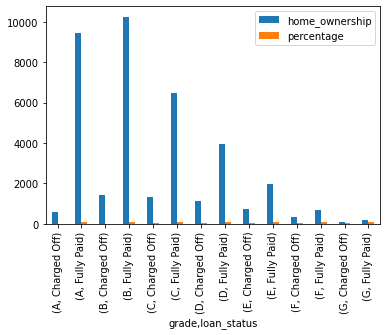

In [182]:
pivot = loans.pivot_table(index =['grade','loan_status'], 
                       values =['home_ownership'], aggfunc ='count')


#table['% of Total'] = (table.C / table.C.sum() * 100).astype(str) + '%'
pivot['percentage'] = (pivot.home_ownership / pivot.groupby(level=0).home_ownership.transform(sum) * 100)
print(pivot)
pivot.plot.bar()

                        home_ownership  percentage
addr_state loan_status                            
AK         Charged Off              15   19.230769
           Fully Paid               63   80.769231
AL         Charged Off              54   12.413793
           Fully Paid              381   87.586207
AR         Charged Off              27   11.489362
...                                ...         ...
WI         Fully Paid              377   85.681818
WV         Charged Off              21   12.209302
           Fully Paid              151   87.790698
WY         Charged Off               4    5.000000
           Fully Paid               76   95.000000

[97 rows x 2 columns]


<AxesSubplot:xlabel='addr_state,loan_status'>

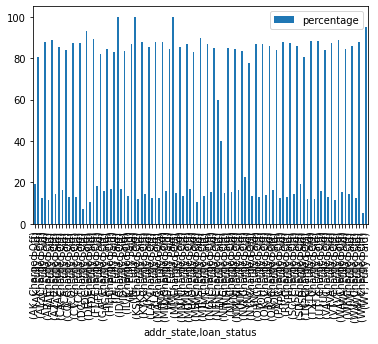

In [196]:

def mean_no_outliers(values):
    no_outliers = values.quantile([0.1, 0.9])
    mean = np.mean(no_outliers)
    return mean

pivot = loans.pivot_table(index =['addr_state','loan_status'], 
                       values =['home_ownership'], aggfunc ='count')


#table['% of Total'] = (table.C / table.C.sum() * 100).astype(str) + '%'
pivot['percentage'] = (pivot.home_ownership / pivot.groupby(level=0).home_ownership.transform(sum) * 100)


print(pivot)
pivot.plot.figsize = (6,6)
pivot.plot.bar(y='percentage')


                         home_ownership  percentage
delinq_2yrs loan_status                            
0           Charged Off            4936   14.354679
            Fully Paid            29450   85.645321
1           Charged Off             507   15.809167
            Fully Paid             2700   84.190833
2           Charged Off             130   19.316493
            Fully Paid              543   80.683507
3           Charged Off              35   16.509434
            Fully Paid              177   83.490566
4           Charged Off              13   21.666667
            Fully Paid               47   78.333333
5           Charged Off               3   14.285714
            Fully Paid               18   85.714286
6           Charged Off               1   10.000000
            Fully Paid                9   90.000000
7           Charged Off               1   25.000000
            Fully Paid                3   75.000000
8           Charged Off               1   50.000000
            

<AxesSubplot:xlabel='delinq_2yrs,loan_status'>

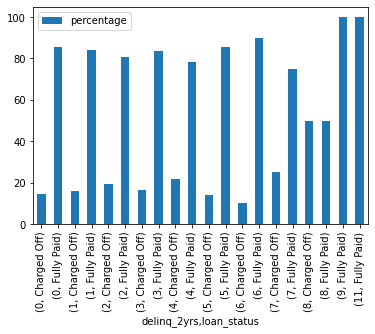

In [197]:
#Analysis delinq_2yrs

pivot_delinq_2yrs = loans.pivot_table(index =['delinq_2yrs','loan_status'], 
                       values =['home_ownership'], aggfunc ='count')


pivot_delinq_2yrs['percentage'] = (pivot_delinq_2yrs.home_ownership / pivot_delinq_2yrs.groupby(level=0).home_ownership.transform(sum) * 100)


print(pivot_delinq_2yrs)
pivot_delinq_2yrs.plot.bar(y='percentage')

#Conclusion - For more than 1 delinquency incidents there is clear indication of customer being charged off

<AxesSubplot:xlabel='dti,loan_status'>

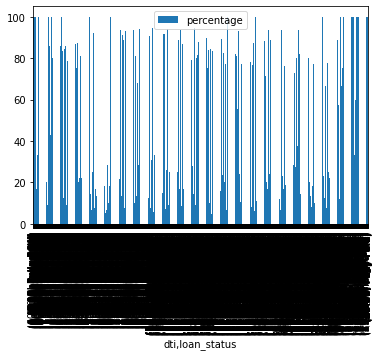

In [224]:
#Analysis dti ratio

pivot_dti = loans.pivot_table(index =['dti','loan_status'], 
                       values =['home_ownership'], aggfunc ='count')


pivot_dti['percentage'] = (pivot_dti.home_ownership / pivot_dti.groupby(level=0).home_ownership.transform(sum) * 100)
#pivot_dti = pivot_dti.filter(items = ['loan_status'], axis=0)
#pivot_dti = pivot_dti.loc[:'Charged Off']

#print(pivot_dti.loc[:"Charged Off"])
pivot_dti.plot.bar(y='percentage')

#Conclusion - 

/var/folders/kp/4mdlby_s1_n2rndtn7k_2kd0_rkjpd/T/ipykernel_3569/2485522667.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loans_segment['range_funded_amount'] = loans_segment['funded_amnt'] / 5000
/var/folders/kp/4mdlby_s1_n2rndtn7k_2kd0_rkjpd/T/ipykernel_3569/2485522667.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loans_segment['range_funded_amount'] = loans_segment['range_funded_amount'].apply(np.floor)


                                 funded_amnt
range_funded_amount loan_status             
0.0                 Charged Off         1044
                    Fully Paid          6494
1.0                 Charged Off         1603
                    Fully Paid         10692
2.0                 Charged Off         1198
                    Fully Paid          7659
3.0                 Charged Off          815
                    Fully Paid          3889
4.0                 Charged Off          494
                    Fully Paid          2341
5.0                 Charged Off          268
                    Fully Paid          1165
6.0                 Charged Off           79
                    Fully Paid           337
7.0                 Charged Off          126
                    Fully Paid           373
                                 funded_amnt  percentage
range_funded_amount loan_status                         
0.0                 Charged Off         1044   13.849828
                   

<AxesSubplot:xlabel='dti,loan_status'>

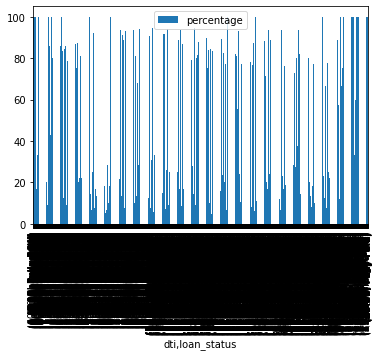

In [253]:
#Analysis funded_amnt

loans_segment = loans[["loan_status", "funded_amnt"]]

loans_segment['range_funded_amount'] = loans_segment['funded_amnt'] / 5000
loans_segment['range_funded_amount'] = loans_segment['range_funded_amount'].apply(np.floor)


pivot_loans_segment = loans_segment.pivot_table(index =['range_funded_amount','loan_status'], 
                       values =['funded_amnt'], aggfunc ='count')

print(pivot_loans_segment)
pivot_loans_segment['percentage'] = (pivot_loans_segment.funded_amnt / pivot_loans_segment.groupby(level=0).funded_amnt.transform(sum) * 100)
print(pivot_loans_segment)
#pivot_dti.plot.bar(y='percentage')

#Conclusion - Charge off percentage increases with the increase in funded_amnt it is more than 18% if the
#funded amount goes beyond 25K

In [256]:
#Analysis total_acc

loans_segment = loans[["loan_status", "total_acc"]]

loans_segment['range_total_acc'] = loans_segment['total_acc'] / 5
loans_segment['range_total_acc'] = loans_segment['range_total_acc'].apply(np.floor)


pivot_loans_segment = loans_segment.pivot_table(index =['range_total_acc','loan_status'], 
                       values =['total_acc'], aggfunc ='count')

print(pivot_loans_segment)
pivot_loans_segment['percentage'] = (pivot_loans_segment.total_acc / pivot_loans_segment.groupby(level=0).total_acc.transform(sum) * 100)
print(pivot_loans_segment)
#pivot_dti.plot.bar(y='percentage')

#Conclusion - Charge off percentage increases with the zero in total_acc it is more than 15% which is base average

/var/folders/kp/4mdlby_s1_n2rndtn7k_2kd0_rkjpd/T/ipykernel_3569/2822227706.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loans_segment['range_total_acc'] = loans_segment['total_acc'] / 5
/var/folders/kp/4mdlby_s1_n2rndtn7k_2kd0_rkjpd/T/ipykernel_3569/2822227706.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loans_segment['range_total_acc'] = loans_segment['range_total_acc'].apply(np.floor)


                             total_acc
range_total_acc loan_status           
0.0             Charged Off        122
                Fully Paid         476
1.0             Charged Off        668
                Fully Paid        3407
2.0             Charged Off       1007
                Fully Paid        5466
3.0             Charged Off       1010
                Fully Paid        5925
4.0             Charged Off        873
                Fully Paid        5561
5.0             Charged Off        666
                Fully Paid        4366
6.0             Charged Off        504
                Fully Paid        3105
7.0             Charged Off        354
                Fully Paid        2036
8.0             Charged Off        208
                Fully Paid        1139
9.0             Charged Off        115
                Fully Paid         681
10.0            Charged Off         38
                Fully Paid         401
11.0            Charged Off         28
                Fully Pai

/var/folders/kp/4mdlby_s1_n2rndtn7k_2kd0_rkjpd/T/ipykernel_3569/3790695587.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loans_segment_corr['loan_status'] =loans_segment_corr['loan_status'].replace(['Fully Paid','Charged Off'],[0,1])


  addr_state  annual_inc grade home_ownership         purpose sub_grade  \
0         AZ     24000.0     B           RENT     credit_card        B2   
1         GA     30000.0     C           RENT             car        C4   
2         IL     12252.0     C           RENT  small_business        C5   
3         CA     49200.0     C           RENT           other        C1   
5         AZ     36000.0     A           RENT         wedding        A4   

  verification_status  delinq_2yrs    dti  funded_amnt  total_acc  loan_status  
0            Verified            0  27.65         5000          9            0  
1     Source Verified            0   1.00         2500          4            1  
2        Not Verified            0   8.72         2400         10            0  
3     Source Verified            0  20.00        10000         37            0  
5     Source Verified            0  11.20         5000         12            0  
(38577, 12)


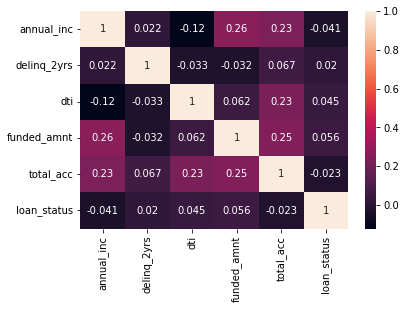

In [272]:
loans_segment_corr = loans[["addr_state","annual_inc","grade","home_ownership","purpose","sub_grade","verification_status","delinq_2yrs","dti","funded_amnt","total_acc","loan_status"]]
#loans_segment_corr['loan_status_num'] = loans_segment_corr[loans_segment_corr["loan_status"] == ]

loans_segment_corr['loan_status'] =loans_segment_corr['loan_status'].replace(['Fully Paid','Charged Off'],[0,1])
print(loans_segment_corr.head())
print(loans_segment_corr.shape)

corrMatrix = loans_segment_corr.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()